<a href="https://colab.research.google.com/github/ShubhraJha/online-food-delivery-sales-analysis/blob/main/online_food_delivery_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing required libraries for data manipulation,analysis,and visualization

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Read the original dataset and convert order_time to datetime

In [ ]:
df=pd.read_csv("online_food_delivery_sales.csv",parse_dates=["order_time"])
print(df.shape)
print(df.head())
print(df.isnull().sum())
print(df.info())

(13000, 15)
   order_id       restaurant       cuisine       city          order_time  \
0    200000      HealthyBowl       Italian    Kolkata 2024-04-01 20:29:00   
1    200001         PizzaBox       Biryani       Pune 2024-01-25 17:46:00   
2    200002      GrillMaster  North Indian      Delhi 2024-02-18 02:26:00   
3    200003      GrillMaster       Chinese  Bangalore 2024-03-31 21:27:00   
4    200004  Biryani Express       Healthy    Chennai 2024-03-27 03:10:00   

   prep_time_min  delivery_time_min  delivery_distance_km  price  \
0             19                 32                  8.70    485   
1             26                 47                  7.75    301   
2             25                 59                  6.67    619   
3             18                 48                 11.24    580   
4             16                 53                  1.43    266   

   discount_percent  final_amount  rating payment_method  is_first_order  \
0                20         388.0       

In [ ]:
df.rename(columns={'delivery_time_min':'deli_time','delivery_distance_km':'deli_dist','prep_time_min':'prep_time','final_amount':'revenue'},inplace=True)

In [ ]:
# Feature engineering:deriving date, month, and weekday from order_time

In [ ]:
df['date']=df['order_time'].dt.date
df['month']=df['order_time'].dt.month_name()
df['week_day']=df['order_time'].dt.day_name()
print(df["month"].unique())

['April' 'January' 'February' 'March' 'December' 'May' 'September' 'July'
 'June' 'August' 'October' 'November']


In [ ]:
print("total orders",len(df))
print("total revenue",df["revenue"].sum())

total orders 13000
total revenue 5463398.5


In [ ]:
# CITY WISE ANALYSIS

In [ ]:
city_Analysis=df.groupby('city').agg(total_order=("order_id","count"),total_revenue=("revenue","sum"),avg_delivery_time=("deli_time","mean"),avg_dist=("deli_dist","mean")).reset_index()

In [ ]:
city_sorted = city_Analysis.sort_values(by=["total_order"],ascending=[False])

In [ ]:
print(city_sorted.head(5))

      city  total_order  total_revenue  avg_delivery_time  avg_dist
5   Mumbai         1922      797221.35          59.194069  7.641608
6     Pune         1888      788835.90          58.559852  7.547733
4  Kolkata         1887      789298.05          58.396396  7.633985
2    Delhi         1867      780293.10          59.687734  7.737424
1  Chennai         1836      779263.60          59.927015  7.840289


In [ ]:
order_day=df.groupby("week_day")["order_id"].count()
weekday_order=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
order_day=order_day.reindex(weekday_order)
print(order_day)

week_day
Monday       1894
Tuesday      1800
Wednesday    1834
Thursday     1849
Friday       1851
Saturday     1849
Sunday       1923
Name: order_id, dtype: int64


In [ ]:
# Analyze order volume across different weekdays to identify peak ordering days

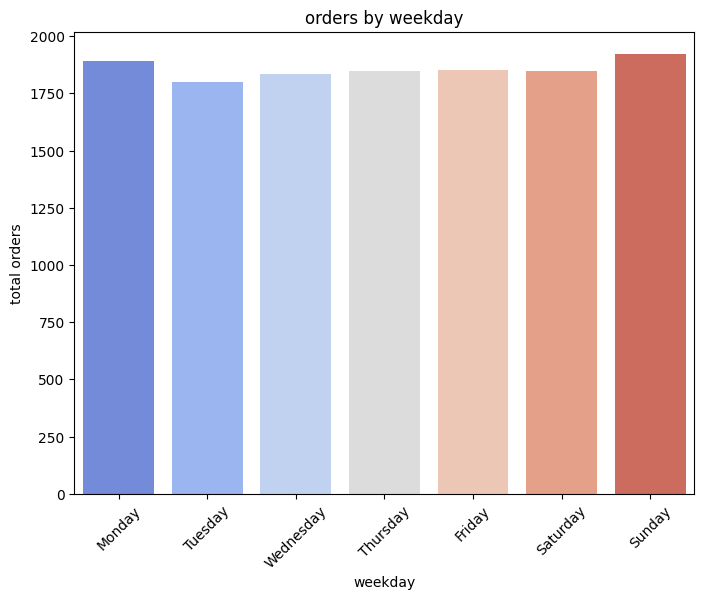

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(x=order_day.index,y=order_day.values,hue=order_day.index,palette="coolwarm",legend=False)
plt.title("orders by weekday")
plt.xlabel("weekday")
plt.ylabel("total orders")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Monthly order trend analysis to identify seasonal demand patterns and growth trends

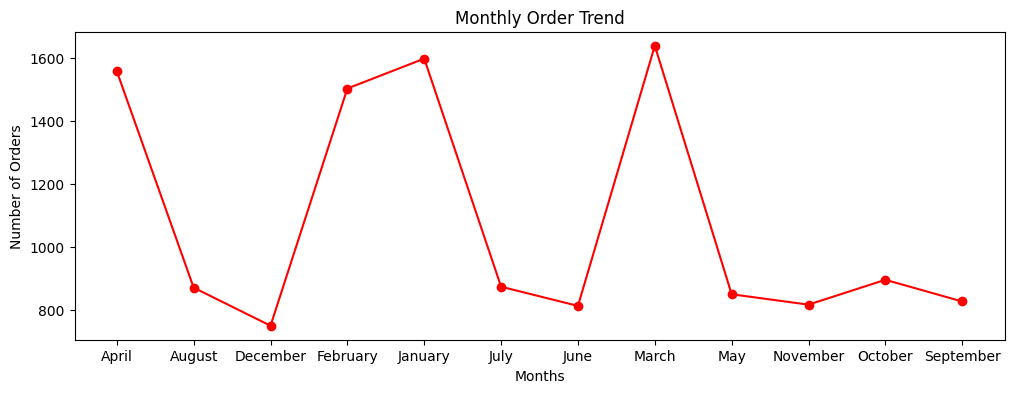

In [ ]:
monthly_orders=df.groupby("month")["order_id"].count().reset_index()
plt.figure(figsize=(12,4))
plt.plot(monthly_orders["month"],monthly_orders["order_id"],marker="o",color="red")
plt.title("Monthly Order Trend")
plt.xlabel("Months")
plt.ylabel("Number of Orders")
plt.show()

In [ ]:
# RESTAURANT WISE ANALYSIS

In [ ]:
restaurant_Analysis=df.groupby("restaurant").agg(total_order=("order_id","count"),total_revenue=("revenue","sum"),avg_prep_time=("prep_time","mean"),avg_rating=("rating","mean"),avg_discount=("discount_percent", "mean")).reset_index()
sorted_rest=restaurant_Analysis.sort_values(by=["avg_discount"],ascending=[False])
print(sorted_rest.head(5))

     restaurant  total_order  total_revenue  avg_prep_time  avg_rating  \
7      PizzaBox          858      356879.85      27.072261    2.979021   
9      SpiceHub          930      388396.25      26.904301    2.935484   
4   GrillMaster          914      370750.05      27.233042    3.079869   
6   PastaFiesta          838      354228.95      27.082339    3.075179   
14    WrapWorld          879      373899.80      27.422071    3.061433   

    avg_discount  
7      18.065268  
9      17.580645  
4      17.412473  
6      17.338902  
14     17.269625  


In [ ]:
# Analyze total revenue generated by each city to compare market performance

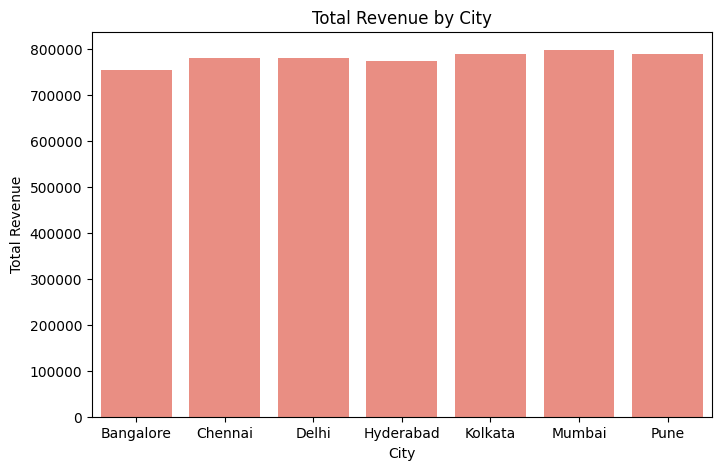

In [ ]:
citywise=df.groupby("city")["revenue"].sum()
plt.figure(figsize=(8,5))
sns.barplot(x=citywise.index,y=citywise.values,color="salmon")
plt.title("Total Revenue by City")
plt.xlabel("City")
plt.ylabel("Total Revenue")
plt.show()

In [ ]:
# Analyzing cuisine-wise order volume and revenue across different cities

In [ ]:
cuisine_Analysis=df.groupby(["cuisine","city"]).agg(total_order=("order_id","count"),total_price=("price","mean"),total_revenue=("revenue","sum"),avg_discount=("discount_percent", "mean")).reset_index()
cuisine_sorted=cuisine_Analysis.sort_values(by=["total_order"],ascending=[False])
print(cuisine_sorted.head(5))


         cuisine     city  total_order  total_price  total_revenue  \
47  North Indian   Mumbai          260   494.353846      107616.85   
53  South Indian  Kolkata          256   517.605469      110055.70   
25       Healthy  Kolkata          252   476.896825       99649.40   
16     Fast Food    Delhi          251   501.434263      105726.50   
44  North Indian    Delhi          250   503.112000      104655.95   

    avg_discount  
47     16.596154  
53     16.679688  
25     16.845238  
16     15.776892  
44     16.860000  


In [ ]:
# Identifying weekdays with higher promotional discounts

week_day
Monday       16.847941
Tuesday      17.194444
Wednesday    16.960196
Thursday     17.106544
Friday       17.223123
Saturday     17.433748
Sunday       17.194488
Name: discount_percent, dtype: float64


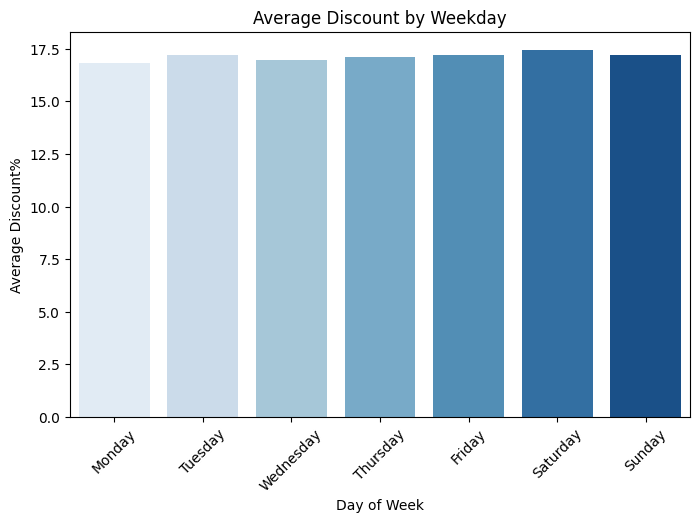

In [ ]:
daywise_discount=df.groupby("week_day")["discount_percent"].mean()
weekday_order=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
daywise_discount = daywise_discount.reindex(weekday_order)
print(daywise_discount)
plt.figure(figsize=(8,5))
sns.barplot(x=daywise_discount.index,y=daywise_discount.values,hue=daywise_discount.index,palette="Blues",legend=False)
plt.title("Average Discount by Weekday")
plt.ylabel("Average Discount%")
plt.xlabel("Day of Week")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Analyzing average discounts offered across different months

month
January      17.695435
February     16.781915
March        17.143293
April        17.001283
May          16.282353
June         17.281673
July         17.522883
August       16.613088
September    16.632406
October      16.986607
Name: discount_percent, dtype: float64


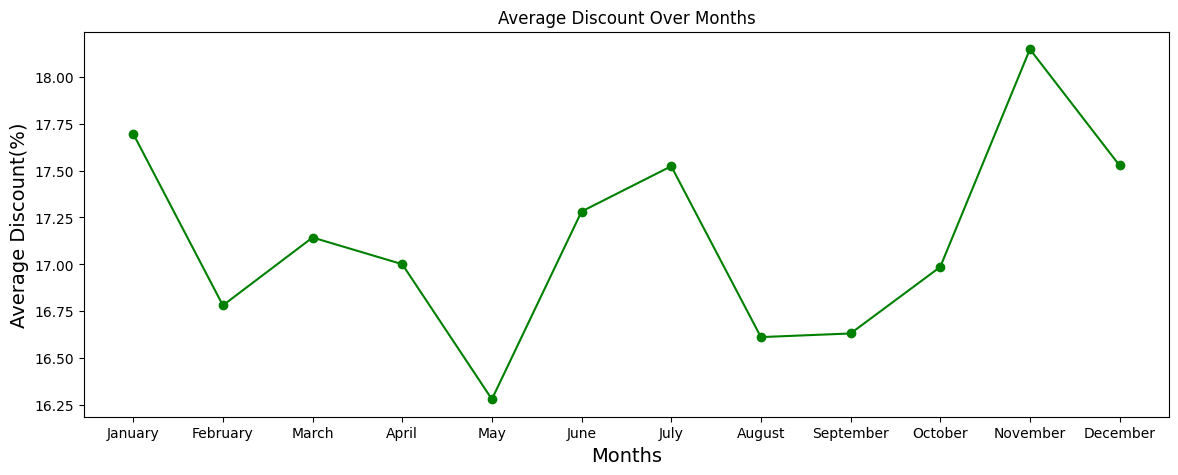

In [ ]:
monthlywise=df.groupby("month")["discount_percent"].mean()
months=['January','February','March','April','May','June','July','August','September','October','November','December']
monthlywise=monthlywise.reindex(months)
print(monthlywise.head(10))
plt.figure(figsize=(14,5))
plt.plot(monthlywise.index,monthlywise.values,marker="o",color="Green")
plt.title("Average Discount Over Months")
plt.xlabel("Months",fontsize=14)
plt.ylabel("Average Discount(%)",fontsize=14)
plt.show()